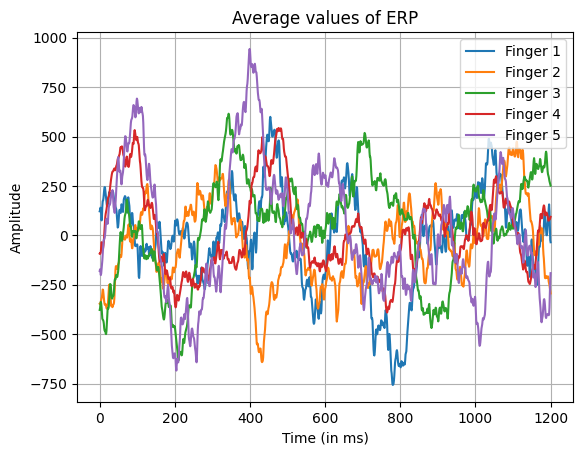

[[ 121.5859375   128.078125    140.1796875  ...   42.8125
   -23.765625    -34.859375  ]
 [-346.25210084 -345.36134454 -342.79831933 ... -267.57983193
  -281.78991597 -293.69747899]
 [-377.33333333 -367.99166667 -346.64166667 ...  265.88333333
   258.375       251.18333333]
 [ -92.44736842  -89.54210526  -91.61578947 ...   81.10526316
    87.2          93.63684211]
 [-180.35135135 -171.59459459 -185.48648649 ... -294.05405405
  -222.86486486 -191.21621622]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def calc_mean_erp(trial_points, ecog_data):
    trial_points = pd.read_csv(trial_points)
    trial_points = trial_points.astype(int)
    #Giving names to columns
    trial_points.columns = ['start_point', 'peak_point', 'finger_number']

    # Load ECoG data
    ecog_data = pd.read_csv(ecog_data, header=None)
    ecog_signal = ecog_data[0].values

    # Making initial empty matrix
    fingers_erp = {finger: [] for finger in range(1, 6)}

    # Extract ERP for each trial
    for i, row in trial_points.iterrows():
        start = row['start_point']
        finger = row['finger_number']

        #We put all values of ERP in one big matrix
        if start - 200 >= 0 and start + 1001 < len(ecog_signal):
            erp = ecog_signal[start - 200:start + 1001]
            fingers_erp[finger].append(erp)

    #Making final matrix of zeroes, which will be replaced by values of ERP
    fingers_erp_mean = np.zeros((5, 1201))

    #Putting average values of ERP in our matrix
    for finger in range(1, 6):
        if fingers_erp[finger]:
            fingers_erp_mean[finger - 1, :] = np.mean(fingers_erp[finger], axis=0)

    #Ploting all ERPs on one graph
    for finger in range(1, 6):
        plt.plot(fingers_erp_mean[finger - 1], label=f'Finger {finger}')

    plt.title('Average values of ERP')
    plt.xlabel('Time (in ms)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

    return fingers_erp_mean

#Direction of files with data
trial_points = 'C:/Users/Макс Бубашвили/Downloads/events_file_ordered.csv'
ecog_data = 'C:/Users/Макс Бубашвили/Downloads/brain_data_channel_one.csv'

fingers_erp_mean = calc_mean_erp(trial_points, ecog_data)

print(fingers_erp_mean)
